# Comenzamos primero con la carga de librerias necesarias para el entrenamiento del modelo

In [1]:
import pandas
import matplotlib.pyplot as plt
import keras
import tensorflow.keras.optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score

Using TensorFlow backend.


# Primer preprocesamiento simple, acorde al TP1

In [4]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica
from preprocessing import plot_roc_curves
from preprocessing import graficar_matriz_confusion

df, df_holdout = obtener_datasets()
X_df, y_df = aplicar_preparacion(df)


# acá solo convierto simplemente a numerico.. primer preprocessing!
X_df = conversion_numerica(X_df) 


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=30,stratify=y_df)

## Por el momento solo aplico ese primer preprocesamiento

In [6]:
X_df

,anios_estudiados,edad,educacion_alcanzada,suma_declarada_bolsa_argentina,horas_trabajo_registradas,genero_mujer,estado_marital_matrimonio_civil,estado_marital_matrimonio_militar,estado_marital_pareja_no_presente,estado_marital_separado_a,...,categoria_de_trabajo_sin_trabajo,categoria_de_trabajo_trabajo_voluntariado,religion_budismo,religion_cristianismo,religion_judaismo,religion_otro,rol_familiar_registrado_con_hijos,rol_familiar_registrado_otro,rol_familiar_registrado_sin_familia,rol_familiar_registrado_soltero_a
0,17,39,5,2174,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,17,50,5,0,13,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,13,38,4,0,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,11,53,3,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,17,28,5,0,40,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,27,5,0,38,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32557,13,40,4,0,40,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32558,13,58,4,0,40,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,13,22,4,0,20,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# En primer lugar diseño la red

In [7]:
num_classes = 2

model = Sequential()
model.add(Dense(8,input_shape = (40,),activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


# Ya tengo el primer modelo compilado voy a entrenarlo

In [8]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [9]:
history = model.fit(X_train.values, y_train,epochs=3,verbose=0,validation_data=(X_test.values, y_test))

# Grafico evolución en función de epocs

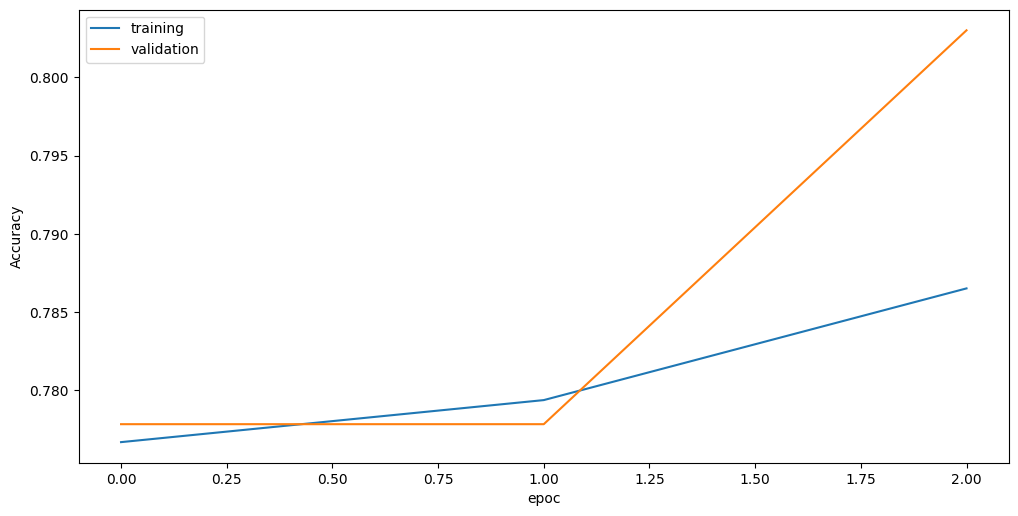

In [10]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

# Busco bajar el learning rate porque esta over shootiando, poner mas epocs y regularizo también

In [11]:
from keras.regularizers import l2

In [14]:
num_clases = 2
model = Sequential()
model.add(Dense(16, input_shape=(40,), activation='tanh', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.25))
model.add(Dense(8, activation='tanh', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.25))
model.add(Dense(4, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(Dense(num_clases, activation="softmax"))





In [15]:
#opt = RMSprop(lr=0.0001)
opt = tensorflow.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',"AUC","Precision","Recall"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                656       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10        
Total params: 838
Trainable params: 838
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train.values, y_train,epochs=100,verbose=1,validation_data=(X_test.values, y_test))

Epoch 1/100
814/814 [==============================] - 6s 6ms/step - loss: 0.5065 - accuracy: 0.7751 - auc: 0.8509 - precision: 0.7751 - recall: 0.7751 - val_loss: 0.4064 - val_accuracy: 0.8181 - val_auc: 0.9088 - val_precision: 0.8181 - val_recall: 0.8181
Epoch 2/100
814/814 [==============================] - 3s 4ms/step - loss: 0.4414 - accuracy: 0.7974 - auc: 0.8885 - precision: 0.7974 - recall: 0.7974 - val_loss: 0.4051 - val_accuracy: 0.8207 - val_auc: 0.9075 - val_precision: 0.8207 - val_recall: 0.8207
Epoch 3/100
814/814 [==============================] - 4s 5ms/step - loss: 0.4130 - accuracy: 0.8077 - auc: 0.9020 - precision: 0.8077 - recall: 0.8077 - val_loss: 0.4174 - val_accuracy: 0.7860 - val_auc: 0.8981 - val_precision: 0.7860 - val_recall: 0.7860
Epoch 4/100
814/814 [==============================] - 4s 4ms/step - loss: 0.4134 - accuracy: 0.8080 - auc: 0.9015 - precision: 0.8080 - recall: 0.8080 - val_loss: 0.3832 - val_accuracy: 0.8222 - val_auc: 0.9157 - val_precision: 

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("AUC")
plt.xlabel("epoc")
plt.plot(history.history["auc"], label="training")
plt.plot(history.history["val_auc"], label="validation")
plt.legend()

# Evaluo Modelo

In [2]:
prediccion = model.predict(X_train)

NameError: name 'model' is not defined

In [1]:
prediccion[:20]

NameError: name 'prediccion' is not defined

# Conclusion parcial

Como dato: probe varios optimizadores y varios learning rates y varias configuraciones de redes. El optimizador es este o el adam. El learning rate mas chicho no sirve y mas grande overshootea mucho. La red si la complejizas mas se va todo a la mierda rapidamente